# Algorithms: data to graph

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

## Similarity graph
In many cases,  
we are only interested in the "closeness" of points,  
but not the actual position of the points.  

Thus, we may draw a graph  
whose vertices are the points and  
whose edges are pairs that are "close" to each other.  

Such a graph is called the **similarity graph**.

For example, each vertex is a person  
while two vertices are adjacent  
if the two persons share enough common interests.

### $k$-nearest neighborhood (kNN)
Suppose there are $N$ points.  
We may compute the distance between every two points.  

![kNN similarity graph](kNN.png "kNN similarity graph")

Fix a positive integer $k$.  
The notation $u\leftarrow v$ means
$v$ is one of the $k$ nearest points to $u$.

Construct a graph $G$ so that  
each vertex represents a point.
Two vertices $u$ and $v$ are adjacent  
if $u\leftarrow v$ *and* $v\leftarrow u$. 

(You may also define the graph by "or".)

### $\epsilon$-ball
Suppose there are $N$ points.  
We may compute the distance between every two points.  

![Epsilon ball similarity graph](eball.png "Epsilon ball similarity graph")

Fix a small positive value $\epsilon$.

Construct a graph $G$ so that  
each vertex represents a point.
Two vertices $u$ and $v$ are adjacent  
if the distance between $u$ and $v$ is less than $\epsilon$.

### Distance matrix  
In either case,  
the distance of every pair of vertices is required.  
Let's see how to generate these distance.

Let `X` be an array of shape `(N, d)`.  
That is, there are `N` points,  
and each point is in $\mathbb{R}^d$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
N = 10
d = 2

X = np.random.rand(N, d)

In [6]:
### think of X_col as a column of N points [v1, ..., vN]
X_col = X[:, np.newaxis, :]
X_col.shape

(10, 1, 2)

In [7]:
### think of X_row as a row of N points [v1, ..., vN]
X_row = X[np.newaxis, :, :]
X_row.shape

(1, 10, 2)

In [9]:
### diff is an N x N array
### whose i,j-entry is vi - vj
diff = X_col - X_row
diff.shape

(10, 10, 2)

In [11]:
### dist is an N x N array
### whose i,j-entry is 
### dist(vi, vj) = sqrt( square sum of entries of vi - vj )
dist = np.sqrt(np.sum(diff**2, axis=-1))
dist.shape

(10, 10)

In [15]:
### set the printing precision to 2 for NumPy arrays
np.set_printoptions(precision=2)

In [16]:
dist

array([[0.  , 0.56, 0.96, 0.67, 0.68, 0.78, 0.64, 0.38, 0.86, 0.59],
       [0.56, 0.  , 0.55, 0.17, 0.8 , 0.4 , 0.25, 0.64, 0.4 , 0.23],
       [0.96, 0.55, 0.  , 0.38, 0.75, 0.18, 0.33, 0.79, 0.15, 0.37],
       [0.67, 0.17, 0.38, 0.  , 0.76, 0.25, 0.13, 0.66, 0.24, 0.14],
       [0.68, 0.8 , 0.75, 0.76, 0.  , 0.63, 0.64, 0.29, 0.77, 0.62],
       [0.78, 0.4 , 0.18, 0.25, 0.63, 0.  , 0.16, 0.63, 0.14, 0.2 ],
       [0.64, 0.25, 0.33, 0.13, 0.64, 0.16, 0.  , 0.57, 0.22, 0.05],
       [0.38, 0.64, 0.79, 0.66, 0.29, 0.63, 0.57, 0.  , 0.76, 0.53],
       [0.86, 0.4 , 0.15, 0.24, 0.77, 0.14, 0.22, 0.76, 0.  , 0.27],
       [0.59, 0.23, 0.37, 0.14, 0.62, 0.2 , 0.05, 0.53, 0.27, 0.  ]])

Let's wrap it into a function.

In [17]:
def dist_mtx(X):
    """
    Input:
        X: an N x d array,  
           representing N points in R^d
    Output:
        an N x N array whose i,j-entry  
        is the distance between point_i and point_j
    """
    ### you may combine the following three lines  
    ### into one line  
    ### to save memory
    X_col = X[:, np.newaxis, :]
    X_row = X[np.newaxis, :, :]
    diff = X_col - X_row
    dist = np.sqrt(np.sum(diff**2, axis=-1))
    return dist

For all exercises below,  
we obtain `x` by the following.
```Python
np.random.seed(10)
X = np.random.rand(10, 2)
np.random.seed(None)
```
You may change the seed if you wish.

In [24]:
np.random.seed(10)
X = np.random.rand(10, 2)
np.random.seed(None)

##### Exercise
Use `plt.scatter` to  
plot the `N` points in `X`.

In [21]:
### your answer here


##### Exercise
Let `e = 0.4`.  

Use `dist_mtx` to create a list `similarity`  
that contains all pairs of indices `(i,j)`  
such that the distance betwen  
`point_i` and `point_j` is less than `e`.

In [46]:
### your answer here


##### Exercise
Let `e = 0.4`.  

On one figure,  
draw the points in `X` and  
draw the edges for each pair `(i,j)` in `similarity`.

In [46]:
### your answer here


##### Exercise
Write a function `eball_sim(X, e)`  
whose input is a dataset `X` and a threshold `e` and  
whose output is a NetworkX graph `g`,  
using `similarity` as the edges.

In [46]:
### your answer here


##### Exercise
Draw the graph `eball_sim(X, e)`  
using `spectral_layout`.  

Now you have performed a "Laplacian eigenmap"!

In [46]:
### your answer here


##### Exercise
Let `k = 2`.  

Use `np.argparition` and `dist_mtx`  
to create a list `similarity`  
that contains all pairs of indices `(i,j)`  
such that $i\leftarrow j$.

In [46]:
### your answer here


##### Exercise
Let `k = 2`.  

On one figure,  
draw the points in `X` and  
draw the edges for each pair `(i,j)` in `similarity`.

In [46]:
### your answer here


##### Exercise
Write a function `kNN_sim(X, e)`  
whose input is a dataset `X` and a threshold `e` and  
whose output is a NetworkX graph `g`,  
using `similarity` as the edges.

In [46]:
### your answer here


##### Exercise
Draw the graph `kNN_sim(X, e)`  
using `spectral_layout`.  

Now you have performed a "Laplacian eigenmap"!

In [46]:
### your answer here


##### Sample code for epsilon ball

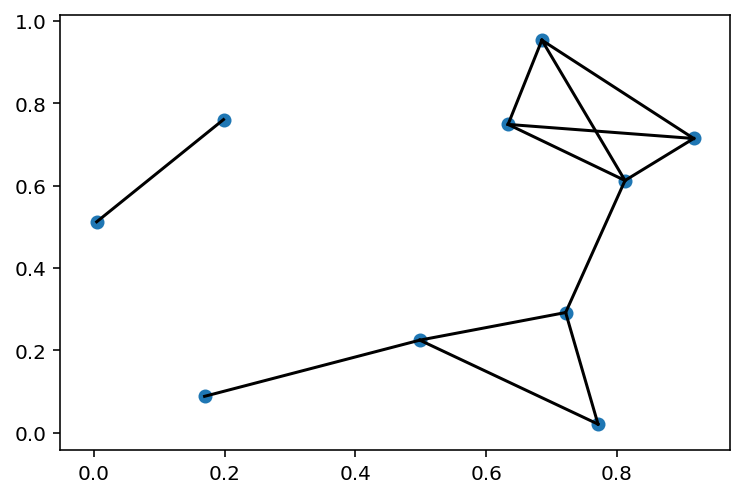

In [53]:
e = 0.4

dist = dist_mtx(X)
similarity = []
N = X.shape[0]
for i in range(N-1):
    for j in range(i,N):
        if dist[i,j] < e:
            similarity.append((i,j))
            
plt.scatter(X[:,0], X[:,1])
for i,j in similarity:
    plt.plot(*zip(X[i], X[j]), 'black')

# fig = plt.gcf()
# fig.savefig('eball.png')

##### Sample code for kNN

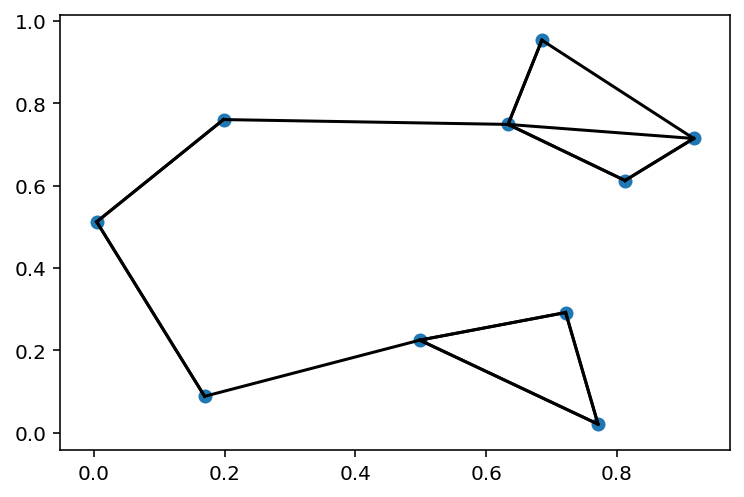

In [62]:
k = 2

dist = dist_mtx(X)

### the diagonal entries are always the smallest
argpar = np.argpartition(dist, k+1) 

similarity = []
N = X.shape[0]
for i in range(N):
    for j in range(k+1):
        similarity.append((i,argpar[i,j]))
            
plt.scatter(X[:,0], X[:,1])
for i,j in similarity:
    plt.plot(*zip(X[i], X[j]), 'black')

# fig = plt.gcf()
# fig.savefig('kNN.png')